In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
np.random.seed(42)  
data = np.random.randint(1, 201, size=(100, 30))

df = pd.DataFrame(data, columns=[f'Col{i+1}' for i in range(30)])

print(df.head())


   Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col21  \
0   103   180    93    15   107    72   189    21   103    122  ...     88   
1    89    49    59   170   188    15   190   190   175    190  ...     18   
2    92   111   188   199   172     8   175    35    81    164  ...    146   
3    40    82   111    53    24   154   188   124    41    157  ...    139   
4   135    72    12   162    33    48   151    62    37     99  ...    103   

   Col22  Col23  Col24  Col25  Col26  Col27  Col28  Col29  Col30  
0    158     38    130    192    188     21    161     58     22  
1    132     89     60     14      9     90     53    130     84  
2     44    162    190     14     95     48     15    200    190  
3     81    136    163    163     33    123      5     41     28  
4     27    137     15     90     42    124    179     63     96  

[5 rows x 30 columns]


In [18]:
df_na = df.mask((df >= 10) & (df <= 60))

na_per_row = df_na.isna().sum(axis=1)

na_per_col = df_na.isna().sum(axis=0)

print("NA count per row:\n", na_per_row.head())
print("\nNA count per column:\n", na_per_col)


NA count per row:
 0     7
1    11
2     8
3     9
4     8
dtype: int64

NA count per column:
 Col1     23
Col2     22
Col3     21
Col4     18
Col5     26
Col6     28
Col7     23
Col8     27
Col9     21
Col10    17
Col11    26
Col12    24
Col13    23
Col14    28
Col15    23
Col16    34
Col17    31
Col18    31
Col19    34
Col20    20
Col21    24
Col22    26
Col23    23
Col24    31
Col25    27
Col26    26
Col27    31
Col28    27
Col29    31
Col30    31
dtype: int64


In [19]:
df_filled = df_na.apply(lambda col: col.fillna(col.mean()), axis=0)

print(df_filled.head())


         Col1        Col2        Col3        Col4        Col5        Col6  \
0  103.000000  180.000000   93.000000  127.792683  107.000000   72.000000   
1   89.000000  124.448718  110.063291  170.000000  188.000000  121.069444   
2   92.000000  111.000000  188.000000  199.000000  172.000000    8.000000   
3  130.116883   82.000000  111.000000  127.792683  120.810811  154.000000   
4  135.000000   72.000000  110.063291  162.000000  120.810811  121.069444   

    Col7        Col8        Col9  Col10  ...       Col21       Col22  \
0  189.0  110.739726  103.000000  122.0  ...   88.000000  158.000000   
1  190.0  190.000000  175.000000  190.0  ...  125.447368  132.000000   
2  175.0  110.739726   81.000000  164.0  ...  146.000000  123.094595   
3  188.0  124.000000  123.556962  157.0  ...  139.000000   81.000000   
4  151.0   62.000000  123.556962   99.0  ...  103.000000  123.094595   

        Col23       Col24       Col25       Col26       Col27       Col28  \
0  124.766234  130.000000  

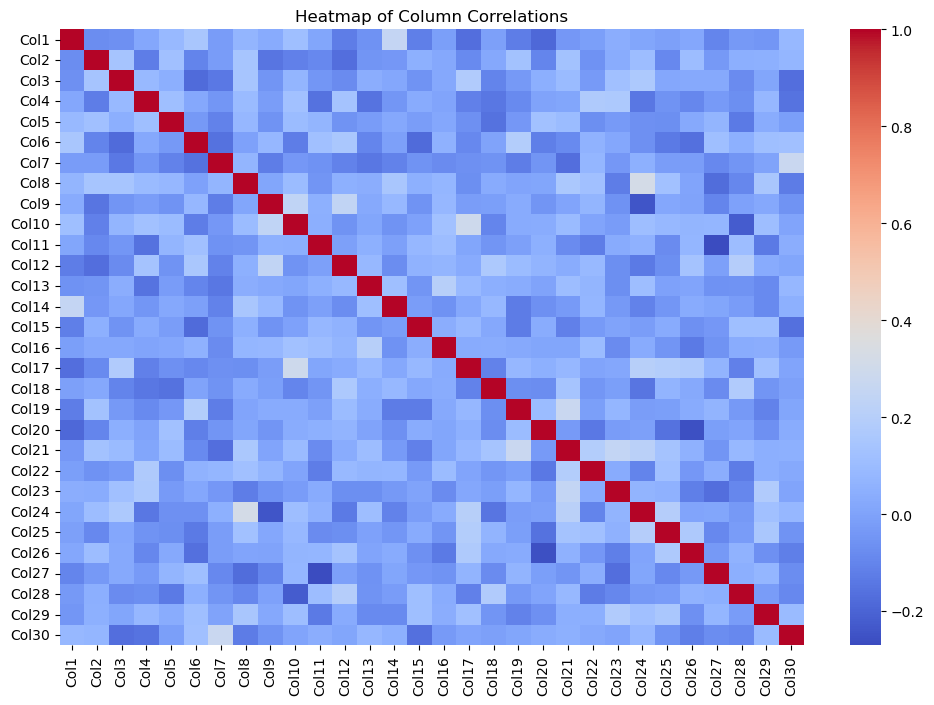

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_filled.corr(), annot=False, cmap="coolwarm")
plt.title("Heatmap of Column Correlations")
plt.show()


In [20]:
corr_matrix = df_filled.corr()
low_corr_pairs = (corr_matrix.where(~np.eye(corr_matrix.shape[0],dtype=bool)) <= 0.7).sum().sum() / 2

print("Number of column pairs with correlation <= 0.7:", int(low_corr_pairs))


Number of column pairs with correlation <= 0.7: 435


In [7]:
df_norm = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min())
df_norm = df_norm * 10

print(df_norm.head())


       Col1      Col2      Col3       Col4      Col5      Col6      Col7  \
0  5.102041  8.963731  4.595960   6.385415  5.329949  3.585859  9.641026   
1  4.387755  6.085426  5.457742   8.527919  9.441624  6.064113  9.692308   
2  4.540816  5.388601  9.393939  10.000000  8.629442  0.353535  8.923077   
3  6.485555  3.886010  5.505051   6.385415  6.031006  7.727273  9.589744   
4  6.734694  3.367876  5.457742   8.121827  6.031006  6.064113  7.692308   

       Col8      Col9     Col10  ...     Col21     Col22     Col23     Col24  \
0  5.514559  5.179487  6.102564  ...  4.416244  7.889447  6.161543  6.548223   
1  9.497487  8.871795  9.589744  ...  6.317125  6.582915  4.336735  6.233355   
2  5.514559  4.051282  8.256410  ...  7.360406  6.135407  8.061224  9.593909   
3  6.180905  6.233690  7.897436  ...  7.005076  4.020101  6.734694  8.223350   
4  3.065327  6.233690  4.923077  ...  5.177665  6.135407  6.785714  6.233355   

      Col25     Col26     Col27     Col28      Col29     Col30

In [21]:
ddf_binary = df_norm.apply(lambda col: col.map(lambda x: 0 if x <= 5 else 1))


print(df_binary.head())


   Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col21  \
0     1     1     0     1     1     0     1     1     1      1  ...      0   
1     0     1     1     1     1     1     1     1     1      1  ...      1   
2     0     1     1     1     1     0     1     1     0      1  ...      1   
3     1     0     1     1     1     1     1     1     1      1  ...      1   
4     1     0     1     1     1     1     1     0     1      0  ...      1   

   Col22  Col23  Col24  Col25  Col26  Col27  Col28  Col29  Col30  
0      1      1      1      1      1      1      1      1      1  
1      1      0      1      1      0      0      1      1      0  
2      1      1      1      1      0      1      1      1      1  
3      0      1      1      1      1      1      0      1      1  
4      1      1      1      0      1      1      1      0      0  

[5 rows x 30 columns]


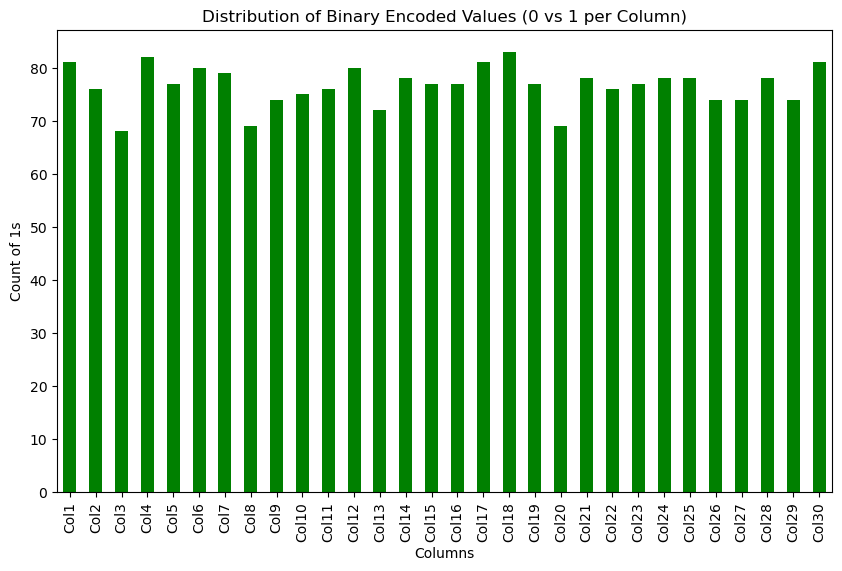

In [22]:
plt.figure(figsize=(10,6))
df_binary.sum().plot(kind='bar', color="green")
plt.title("Distribution of Binary Encoded Values (0 vs 1 per Column)")
plt.ylabel("Count of 1s")
plt.xlabel("Columns")
plt.show()